In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew with British Airways ...
1,✅ Trip Verified | Straightforward check in T...
2,Not Verified | I am beyond upset and disgusted...
3,✅ Trip Verified | I purchased round trip dir...
4,Not Verified | I booked two business class sea...


In [4]:
df.to_csv("BA_reviews.csv")

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from collections import defaultdict

# Download necessary NLTK data and load spaCy model
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nlp = spacy.load("en_core_web_sm")

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Load and preprocess the data
print("Loading and preprocessing data...")
df = pd.read_csv('BA_reviews.csv')
df['reviews'] = df['reviews'].str.replace(r'^✅ Trip Verified \|', '', regex=True)
df['reviews'] = df['reviews'].str.replace(r'^Not Verified \|', '', regex=True)

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_reviews'] = df['reviews'].apply(clean_text)

print(f"Data loaded and preprocessed. Total reviews: {len(df)}")

Loading and preprocessing data...
Data loaded and preprocessed. Total reviews: 3854


In [11]:
df.head()

,Unnamed: 0,reviews,cleaned_reviews
0,0,Flew with British Airways club Europe on Sa...,flew british airways club europe saturday st a...
1,1,Straightforward check in T5. New site for c...,straightforward check new site club check work...
2,2,I am beyond upset and disgusted with the disr...,beyond upset disgusted disregard lack knowledg...
3,3,I purchased round trip direct flight busine...,purchased round trip direct flight business cl...
4,4,I booked two business class seats. We had a m...,booked two business class seats medical emerge...



Generating a general word cloud...


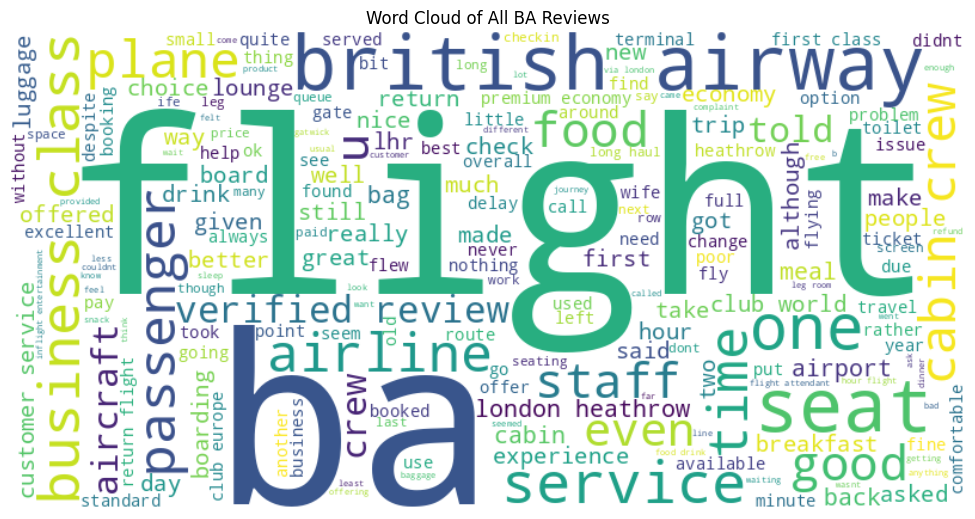

General word cloud generated and saved as 'general_wordcloud.png'


In [13]:
# Generate a general word cloud
print("\nGenerating a general word cloud...")

def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.savefig(filename)
    plt.show()
    plt.close()

# Combine all cleaned reviews
all_reviews_text = ' '.join(df['cleaned_reviews'])

# Generate and save the word cloud
generate_wordcloud(all_reviews_text, "Word Cloud of All BA Reviews", "general_wordcloud.png")

print("General word cloud generated and saved as 'general_wordcloud.png'")



Performing sentiment analysis...
Sentiment Distribution:
Positive: 57.89%
Negative: 40.81%
Neutral: 1.30%


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


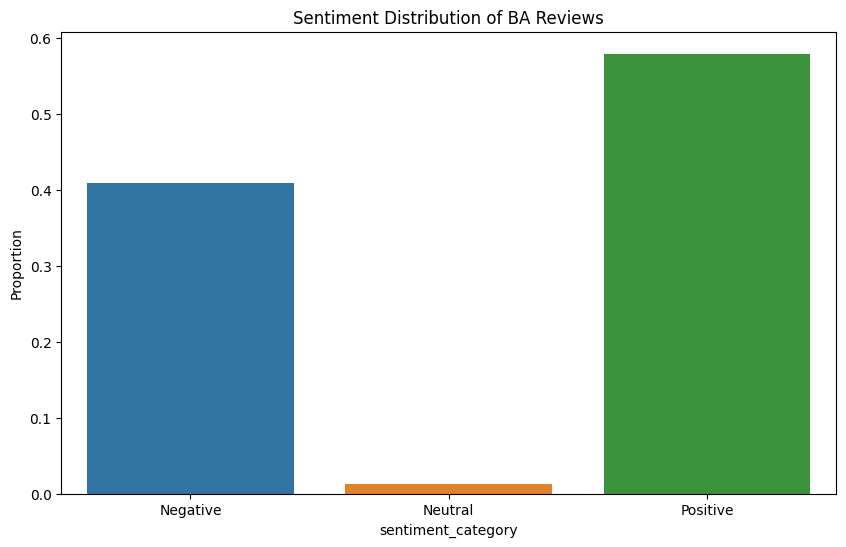

In [14]:
# Sentiment Analysis
print("\nPerforming sentiment analysis...")
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['reviews'].apply(lambda x: sia.polarity_scores(x))
df['compound_sentiment'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment_category'] = pd.cut(df['compound_sentiment'], 
                                  bins=[-1, -0.05, 0.05, 1], 
                                  labels=['Negative', 'Neutral', 'Positive'])

sentiment_dist = df['sentiment_category'].value_counts(normalize=True)
print("Sentiment Distribution:")
for category, percentage in sentiment_dist.items():
    print(f"{category}: {percentage:.2%}")

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values)
plt.title('Sentiment Distribution of BA Reviews')
plt.ylabel('Proportion')
plt.savefig('sentiment_distribution.png')
plt.show()
plt.close()


Analyzing word frequencies...
Top 20 most frequent words:
flight: 6981
ba: 4963
service: 2938
seat: 2456
food: 2413
british: 2248
crew: 2248
london: 2233
airways: 2222
seats: 2171
time: 2153
good: 2143
cabin: 2043
class: 1984
one: 1688
business: 1666
staff: 1619
heathrow: 1575
would: 1559
economy: 1449


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


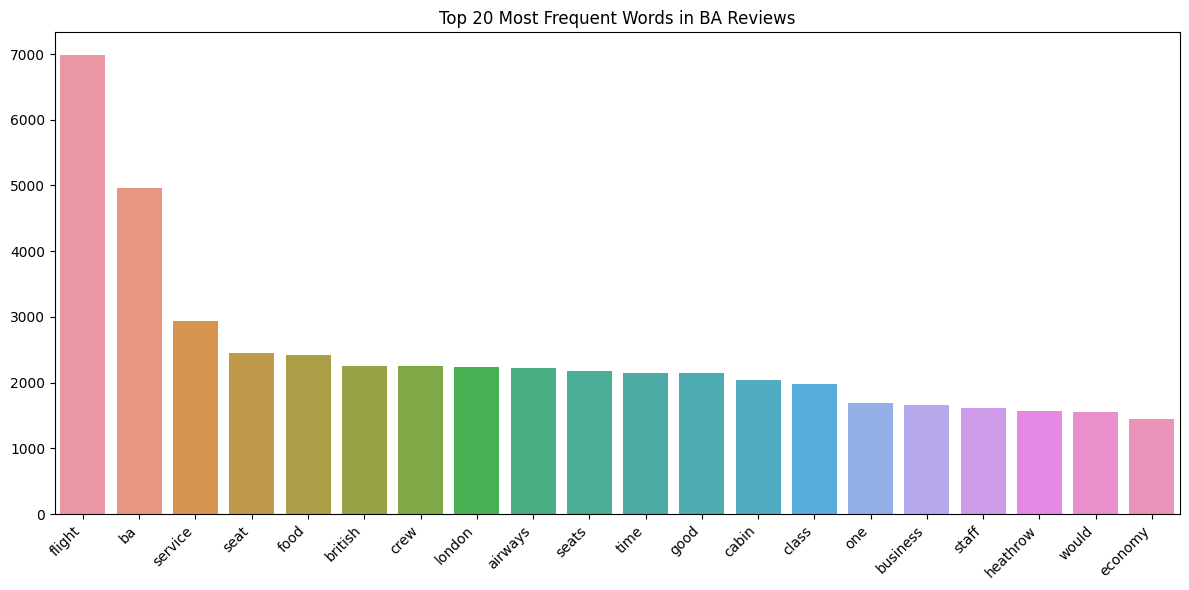

In [15]:
# Word frequency analysis
print("\nAnalyzing word frequencies...")
def get_top_n_words(corpus, n=20):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_words = get_top_n_words(df['cleaned_reviews'])
print("Top 20 most frequent words:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Visualize top words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, _ in top_words], y=[freq for _, freq in top_words])
plt.title('Top 20 Most Frequent Words in BA Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_words.png')
plt.show()
plt.close()

In [16]:
# Topic Modeling using NMF
print("\nPerforming topic modeling...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['cleaned_reviews'])
nmf_model = NMF(n_components=5, random_state=42)
nmf_output = nmf_model.fit_transform(tfidf)

def print_top_words(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics

feature_names = tfidf_vectorizer.get_feature_names_out()
topics = print_top_words(nmf_model, feature_names, 10)

# Function to name topics based on top words
def name_topic(top_words):
    topic_names = {
        'flight experience': set(['seat', 'comfortable', 'class', 'business', 'economy', 'legroom', 'cabin']),
        'customer service': set(['staff', 'crew', 'service', 'friendly', 'helpful', 'attentive']),
        'food and beverages': set(['food', 'meal', 'drink', 'quality', 'breakfast', 'lunch', 'dinner']),
        'booking and check-in': set(['booking', 'check', 'online', 'easy', 'website', 'app']),
        'schedule and punctuality': set(['time', 'delay', 'hour', 'late', 'cancel', 'schedule']),
        'value for money': set(['price', 'expensive', 'cost', 'value', 'worth']),
        'luggage and baggage': set(['bag', 'luggage', 'lost', 'claim']),
        'airport experience': set(['airport', 'lounge', 'security', 'queue', 'wait']),
        'entertainment': set(['entertainment', 'movie', 'wifi', 'screen']),
        'overall experience': set(['experience', 'recommend', 'again', 'never', 'worst', 'best'])
    }
    
    topic_word_set = set(top_words)
    max_overlap = 0
    topic_name = "Miscellaneous"
    
    for name, words in topic_names.items():
        overlap = len(topic_word_set.intersection(words))
        if overlap > max_overlap:
            max_overlap = overlap
            topic_name = name
    
    return topic_name.title()

print("Top 5 topics, their names, and top 10 words:")
for idx, topic_words in enumerate(topics, 1):
    topic_name = name_topic(topic_words)
    print(f"Topic {idx} - {topic_name}:")
    print(", ".join(topic_words))
    print()


Performing topic modeling...
Top 5 topics, their names, and top 10 words:
Topic 1 - Flight Experience:
good, crew, cabin, food, ba, flight, comfortable, excellent, great, seat

Topic 2 - Airport Experience:
flight, ba, told, hours, customer, cancelled, booked, day, refund, airport

Topic 3 - Flight Experience:
class, business, seat, seats, economy, ba, middle, lounge, premium, club

Topic 4 - Schedule And Punctuality:
boarding, lounge, flight, time, check, minutes, quick, late, security, gate

Topic 5 - Customer Service:
british, airways, london, review, verified, airline, heathrow, airlines, service, food




Average sentiment for each aspect:
Delay:
  - Average Sentiment Score: 0.01
  - Sentiment Category: Positive
  - Number of Sentiment Entries: 990
  - Positive Reviews: 309
  - Negative Reviews: 347
  - Neutral Reviews: 334
Staff:
  - Average Sentiment Score: 0.11
  - Sentiment Category: Positive
  - Number of Sentiment Entries: 1608
  - Positive Reviews: 864
  - Negative Reviews: 422
  - Neutral Reviews: 322
Service:
  - Average Sentiment Score: 0.11
  - Sentiment Category: Positive
  - Number of Sentiment Entries: 2968
  - Positive Reviews: 1589
  - Negative Reviews: 864
  - Neutral Reviews: 515
Food:
  - Average Sentiment Score: 0.12
  - Sentiment Category: Positive
  - Number of Sentiment Entries: 2323
  - Positive Reviews: 1283
  - Negative Reviews: 728
  - Neutral Reviews: 312
Comfort:
  - Average Sentiment Score: 0.15
  - Sentiment Category: Positive
  - Number of Sentiment Entries: 1122
  - Positive Reviews: 782
  - Negative Reviews: 303
  - Neutral Reviews: 37

Sample sentimen

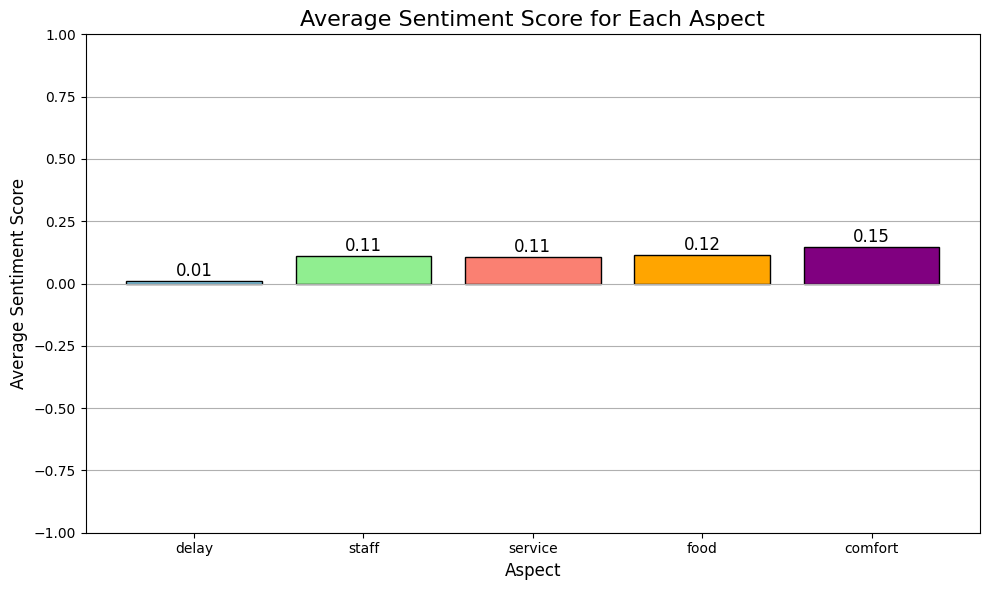

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from textblob import TextBlob
import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Define the aspects to analyze
aspects = ['food', 'service', 'comfort', 'staff', 'delay']

# Dictionary to hold sentiment values for each aspect
aspect_sentiments = defaultdict(list)

# Process each review in the dataset
for _, row in df.iterrows():
    doc = nlp(row['reviews'])  # Process the review text with SpaCy
    for sent in doc.sents:  # Iterate over each sentence in the review
        sent_text = sent.text.lower()  # Convert sentence to lowercase for consistent matching
        for aspect in aspects:
            if aspect in sent_text:  # Check if the aspect is mentioned in the sentence
                # Calculate sentiment polarity using TextBlob
                sentiment = TextBlob(sent_text).sentiment.polarity
                aspect_sentiments[aspect].append(sentiment)  # Store the sentiment for the aspect

# Calculate and display the average sentiment for each aspect
average_sentiments = {}
print("\nAverage sentiment for each aspect:")
for aspect, sentiments in aspect_sentiments.items():
    if sentiments:
        avg_sentiment = sum(sentiments) / len(sentiments)  # Calculate average sentiment
        average_sentiments[aspect] = avg_sentiment  # Store the average sentiment for plotting
        sentiment_category = "Positive" if avg_sentiment > 0 else "Negative" if avg_sentiment < 0 else "Neutral"
        
        print(f"{aspect.capitalize()}:")
        print(f"  - Average Sentiment Score: {avg_sentiment:.2f}")
        print(f"  - Sentiment Category: {sentiment_category}")
        print(f"  - Number of Sentiment Entries: {len(sentiments)}")
        print(f"  - Positive Reviews: {sum(1 for s in sentiments if s > 0)}")
        print(f"  - Negative Reviews: {sum(1 for s in sentiments if s < 0)}")
        print(f"  - Neutral Reviews: {sum(1 for s in sentiments if s == 0)}")
    else:
        print(f"{aspect.capitalize()}: No sentiments found.")

# Example of how detailed breakdown might look for each aspect
for aspect in aspects:
    if aspect_sentiments[aspect]:
        sentiment_samples = sorted(aspect_sentiments[aspect], key=lambda x: abs(x), reverse=True)[:3]
        print(f"\nSample sentiments for '{aspect}': {sentiment_samples}")

# Plotting the average sentiment scores as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_sentiments.keys(), average_sentiments.values(), color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'], edgecolor='black')

# Add labels and title
plt.title('Average Sentiment Score for Each Aspect', fontsize=16)
plt.xlabel('Aspect', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)

# Display the sentiment scores above the bars
for aspect, score in average_sentiments.items():
    plt.text(aspect, score + 0.02, f'{score:.2f}', ha='center', fontsize=12)

plt.ylim(-1, 1)  # Set y-axis limits for better visualization
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("aspect_sentiment_analysis")
plt.show()


In [18]:
# Word Embeddings and Similarity Analysis
print("\nPerforming word embeddings and similarity analysis...")
tokenized_reviews = [review.split() for review in df['cleaned_reviews']]
word2vec_model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=5, workers=4)

print("Words most similar to 'service':")
for word, similarity in word2vec_model.wv.most_similar('service', topn=5):
    print(f"{word}: {similarity:.2f}")


Performing word embeddings and similarity analysis...
Words most similar to 'service':
bad: 0.75
classy: 0.74
overall: 0.74
best: 0.71
appalling: 0.71
